# Lógica Fuzzy

* Grau de pertinência: o quanto um elemento 'x' pertence a um conjunto 'A'
* Variável: rótulo associado a uma variável linguística
* Conjunto de termos: nomes dados aos valores de cada variável
* Universo de discurso: domínio em que cada variável é definida

<img src="img1.jpg" style=width:500px;height:400px/>

## Funcionamento de um sistema fuzzy

<img src="img4.jpg" style=width:500px;height:400px/>

## Problema da gorjeta

<img src="img2.jpg" style=width:500px;height:400px/>

In [1]:
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

## Criando o Antescendent (Entrada de dados)

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


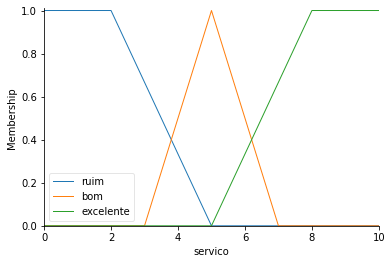

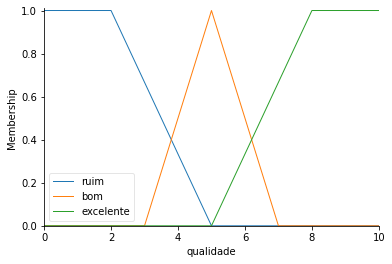

In [5]:
# Definindo universo de discurso e nome da variável
universo = np.arange(0,11)

qualidade = control.Antecedent(universe= universo, label = "qualidade")
servico = control.Antecedent(universe= universo, label = "servico")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
qualidade["ruim"] = fuzzy.trapmf(qualidade.universe, [0, 0, 2, 5])
qualidade["bom"] = fuzzy.trimf(qualidade.universe, [3,5,7])
qualidade["excelente"] = fuzzy.trapmf(qualidade.universe, [5,8,10,10])

servico["ruim"] = fuzzy.trapmf(servico.universe, [0, 0, 2, 5])
servico["bom"] = fuzzy.trimf(servico.universe, [3,5,7])
servico["excelente"] = fuzzy.trapmf(servico.universe, [5,8,10,10])


servico.view()
qualidade.view()


## Criando consequent (Saída de dados)

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


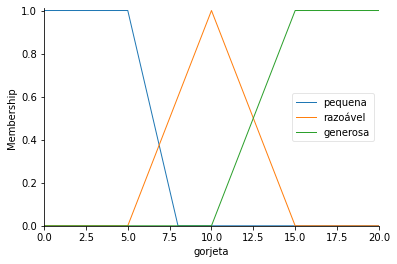

In [6]:
# Universo da gorjeta
universo_gorjeta = np.arange(0,21)

gorjeta = control.Consequent(universe = universo_gorjeta, label = "gorjeta")

gorjeta["pequena"] = fuzzy.trapmf(gorjeta.universe, [0, 0, 5, 8])
gorjeta["razoável"] = fuzzy.trimf(gorjeta.universe, [5,10,15])
gorjeta["generosa"] = fuzzy.trapmf(gorjeta.universe, [10,15,20,20])

gorjeta.view()


## Conjunto de Regras

<img src="img3.jpg" style=width:500px;height:50px/>

In [8]:
regra1 = control.Rule(servico["ruim"]|qualidade["ruim"], gorjeta["pequena"])
regra2 = control.Rule(servico["bom"], gorjeta["razoável"])
regra3 = control.Rule(servico["excelente"]|qualidade["excelente"], gorjeta["generosa"])

# Adicionando regras ao controle
gorjeta_controle = control.ControlSystem([regra1, regra2, regra3])

## Criando o sistema

Resultado 'desfuzzificado': 13.11031934547374


c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


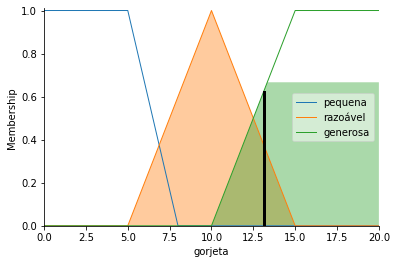

In [12]:
# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(gorjeta_controle)

sistema.input["qualidade"] = 7
sistema.input["servico"] = 5

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['gorjeta']}")

gorjeta.view(sim = sistema)